# Libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pixel_expand
from frameExtraction import FrameExtraction
from masks import Mask

# Paths

In [2]:
videos_csv = '../EchoNet-Dynamic/VolumeTracings.csv'
images_csv = '../EchoNet-Dynamic/images_info.csv'
images_path = '../EchoNet-Dynamic/images/'
videos_path = '../EchoNet-Dynamic/Videos/'
masks_path = '../EchoNet-Dynamic/masked/'

# Save Frames

In [3]:
video_info = pd.read_csv(videos_csv)
video_info.head()

,FileName,X1,Y1,X2,Y2,Frame
0,0X100009310A3BD7FC.avi,51.260417,15.348958,64.932292,69.125000,46
1,0X100009310A3BD7FC.avi,50.037611,17.167841,53.367222,16.321330,46
2,0X100009310A3BD7FC.avi,49.157378,20.407629,57.090549,18.390722,46
3,0X100009310A3BD7FC.avi,48.538173,23.581055,59.997339,20.667707,46
4,0X100009310A3BD7FC.avi,47.918968,26.754480,62.904129,22.944693,46


In [4]:
Extraction = FrameExtraction(video_info=video_info)
Extraction.save_images()

¡Straction Done!
Path images:  ../EchoNet-Dynamic/images/
Path df:  ../EchoNet-Dynamic/images_info.csv


In [5]:
frame_info = pd.read_csv(images_csv)
frame_info

,File,X,Y
0,0X7C076CFBDD1CB990_40.jpeg,58,16
1,0X7C076CFBDD1CB990_40.jpeg,56,18
2,0X7C076CFBDD1CB990_40.jpeg,54,22
3,0X7C076CFBDD1CB990_40.jpeg,53,25
4,0X7C076CFBDD1CB990_40.jpeg,53,29
...,...,...,...
163,0X535B7884988ACFBC_79.jpeg,73,51
164,0X535B7884988ACFBC_79.jpeg,73,53
165,0X535B7884988ACFBC_79.jpeg,73,56
166,0X535B7884988ACFBC_79.jpeg,73,58


# Get Masks

In [6]:
files = os.listdir(images_path)

mask = Mask(
    file_info=frame_info,
    amount_of_frames=2,
    images_files_array=files,
    videos_path=images_path,
)

#mask.generate_masks(action="show")
mask.generate_masks(action="save")

IMAGE SAVING DONE!


# Channel for each landmark

In [11]:
landmarks = [(12,1), (11,2), (0,3), (9,4), (0,0)]

centroid = np.mean(landmarks, axis=0)

print(centroid)


x = [coord[0] for coord in landmarks]
y = [coord[1] for coord in landmarks]

angles = np.arctan2(y - centroid[1], x - centroid[0])

sorted_indices = np.argsort(angles)
sorted_points = [landmarks[i] for i in sorted_indices]
sorted_points

[6.4 2. ]


[(0, 0), (12, 1), (11, 2), (9, 4), (0, 3)]

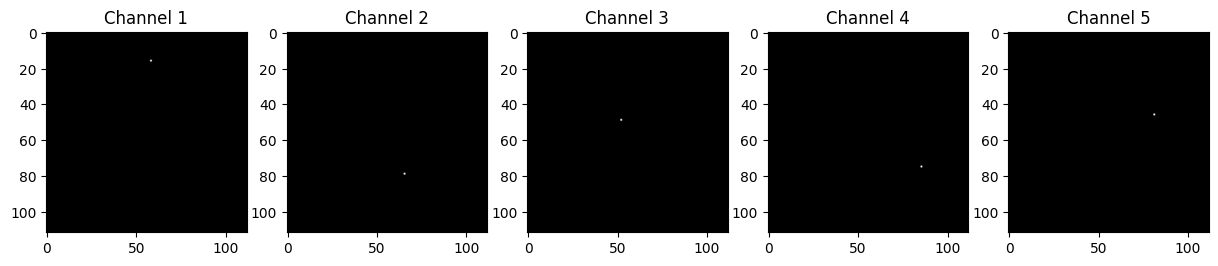

In [14]:
img_shape = (112, 112, 1)
files = pp_img_df['File'].unique()

for file in files[:1]:
    coor = pp_img_df[pp_img_df.File == file]
    puntos = [(int(row['X']), int(row['Y'])) for index, row in coor.iterrows()]
    result_img = np.zeros((112,112, len(coor)), dtype=np.uint8)


    for i in range(len(puntos)):
        img = np.zeros(img_shape, dtype=np.uint8)
        img[puntos[i][1], puntos[i][0]] = 1.0
        result_img[:,:,i] = img[:,: , 0]

    fig, axs = plt.subplots(1, 5, figsize=(15, 5))  # Create 5 subplots for 5 channels
    
    for i in range(5):
        axs[i].imshow(result_img[:, :, i], cmap='gray')  # Assuming grayscale images
        axs[i].set_title(f'Channel {i + 1}')

    plt.show()

# Heatmap Generation

In [ ]:
masks_frames = sa
#area_pixel  = pixel_expand.expand_pixel()

In [10]:

files = os.listdir(masks_path)
kernel = np.ones((3,3), np.uint8)

matrix_size = 112
center_x = 58
center_y = 30
x, y = np.meshgrid(np.arange(matrix_size), np.arange(matrix_size))

# Calculate the distance from the center point for each cell in the grid
distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)

# Normalize the distance to the range [0, 1]
distance = distance / distance.max()

# Invert the distance so that values decrease as you move away from the center
heatmap_matrix = 1 - distance

name_img = os.path.join(masks_path, files[2])
img = cv2.imread(name_img)

# Operations on images
img_erosion = cv2.erode(img, kernel, iterations=2)
img_dilate = cv2.dilate(img, kernel, iterations=2)
img_border = cv2.bitwise_xor(img_dilate, img_erosion)
_, contour = cv2.threshold(img_border, 200,255, cv2.THRESH_BINARY)
contour = contour[:,:,0] / 255.0

expanded_pixel = expand_pixel(contour, center_y, center_x, 7)

result = expanded_pixel * contour * heatmap_matrix
""" fig, axs = plt.subplots(3)
for i in range(3):
    axs[i].imshow(contour[:,:,i])"""


""" plt.imshow(result, cmap='hot', interpolation='nerest')
plt.colorbar()
plt.scatter(center_x, center_y, c='red')
plt.show() """

cv2.imshow("Contour", img_border)
cv2.imshow("Contour 2", img_dilate - img_erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:

files = os.listdir(masks_path)
kernel = np.ones((3,3), np.uint8)

matrix_size = 112
center_x = 58
center_y = 16
x, y = np.meshgrid(np.arange(matrix_size), np.arange(matrix_size))

# Calculate the distance from the center point for each cell in the grid
distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)

# Normalize the distance to the range [0, 1]
distance = distance / distance.max()

# Invert the distance so that values decrease as you move away from the center
heatmap_matrix = 1 - distance

name_img = os.path.join(masks_path, file)
img = cv2.imread(name_img)

# Operations on images
img_erosion = cv2.erode(img, kernel, iterations=2)
img_dilate = cv2.dilate(img, kernel, iterations=2)
img_border = cv2.bitwise_xor(img_dilate, img_erosion)
_, contour = cv2.threshold(img_border, 200,255, cv2.THRESH_BINARY)

img_binary = img_binary[:, :, 0] / 255.0
image_final = (heatmap_matrix * img_binary)
#expanded_pixel = expand_pixel(image_final, center_x, center_y, 7)
#image_final = cv2.bitwise_and(image_final, expanded_pixel)

#result_image = image_final * expanded_pixel
#   np.savetxt('../EchoNet-Dynamic/image.txt', image_final, fmt='%d', delimiter=' ')

""" plt.imshow(result_image, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show() """

" plt.imshow(result_image, cmap='hot', interpolation='nearest')\nplt.colorbar()\nplt.show() "

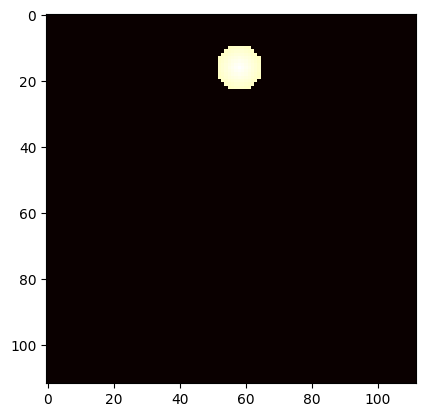

In [31]:
result = expanded_pixel * heatmap_matrix
plt.imshow(result, cmap='hot', interpolation='nearest')

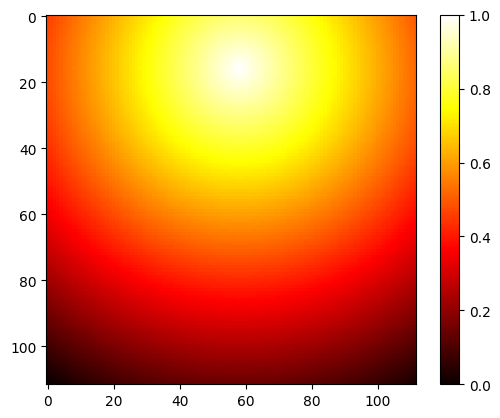

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the matrix
matrix_size = 112

# Define the center point (where values are highest)
center_x = 58
center_y = 16

# Create a grid of coordinates
x, y = np.meshgrid(np.arange(matrix_size), np.arange(matrix_size))

# Calculate the distance from the center point for each cell in the grid
distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)

# Normalize the distance to the range [0, 1]
distance = distance / distance.max()

# Invert the distance so that values decrease as you move away from the center
heatmap_matrix = 1 - distance

# Display the heatmap
plt.imshow(heatmap_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


In [33]:
import numpy as np

# Example matrix
matrix = np.array([
    [1, 2, 3],
    [4, 9, 6],
    [7, 8, 5]
])

# Find the coordinates of the maximum value
max_coordinates = np.unravel_index(np.argmax(matrix), matrix.shape)

# Print the result
print(f"The maximum value is {matrix[max_coordinates]} at coordinates {max_coordinates}")


The maximum value is 9 at coordinates (1, 1)
